In [ ]:
# default_exp hw6

# Import

In [ ]:
# export
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import librosa
import librosa.display

from cs371.utils import *

# HW6

Rush hour problem

In [ ]:
class Car:
    def __init__(self, i, j, L, horiz):
        self.i = i
        self.j = j
        self.L = L
        self.horiz = horiz

In [ ]:
class State:
    def __init__(self):
        self.N = 0 # Our cars are on an NxN grid
        self.cars = [] # The first car is the red car
        self.goal = [0, 0] # The state that our red car needs to reach
        self.prev = None # Pointers to previous states (use later)
    
    def clone(self):
        s = State()
        s.N = self.N
        for c in self.cars:
            s.cars.append(Car(c.i, c.j, c.L, c.horiz))
        s.goal = self.goal.copy()
        return s

    def load_puzzle(self, filename):
        fin = open(filename)
        lines = fin.readlines()
        fin.close()
        self.N = int(lines[0])
        self.goal = [int(k) for k in lines[1].split()]
        for line in lines[2::]:
            fields = line.rstrip().split()
            i, j, L = int(fields[0]), int(fields[1]), int(fields[3])
            horiz = True
            if "v" in fields[2]:
                horiz = False
            self.cars.append(Car(i, j, L, horiz))

    def get_state_grid(self):
        grid = [[-1]*self.N for i in range(self.N)]
        for idx, c in enumerate(self.cars):
            di = 0
            dj = 0
            if c.horiz:
                dj = 1
            else:
                di = 1
            i, j = c.i, c.j
            for k in range(c.L):
                grid[i][j] = idx
                i += di
                j += dj
        return grid
    
    def plot_state_grid(self):
        import numpy as np
        import matplotlib.pyplot as plt
        from matplotlib import cm
        from matplotlib.colors import ListedColormap
        c = cm.get_cmap("Paired", len(self.cars))
        colors = [[1, 1, 1, 1], [1, 0, 0, 1]]
        colors = colors + c.colors.tolist()
        cmap = ListedColormap(colors)
        grid = self.get_state_grid()
        grid = np.array(grid)
        plt.imshow(grid, interpolation='none', cmap=cmap)

    def get_state_printable(self):
        s = ""
        grid = self.get_state_grid()
        for i in range(self.N):
            for j in range(self.N):
                s += "%5s"%grid[i][j]
            s += "\n"
        return s
    
    def get_state_hashable(self):
        s = ""
        grid = self.get_state_grid()
        for i in range(self.N):
            for j in range(self.N):
                s += "{}".format(grid[i][j])
        return s
    
    def reached_goal(self):
        grid = self.get_state_grid()
        res = False
        if grid[self.goal[0]][self.goal[1]] == 0:
            res = True
        return res

    def get_next_moves(self):
        moves = []
        grid = self.get_state_grid()
        for idx, c in enumerate(self.cars):
            # Move down / right
            i = c.i
            di = 0
            j = c.j
            dj = 0
            if c.horiz:
                dj = 1
                j += c.L
            else:
                di = 1
                i += c.L
            if i < self.N and j < self.N and grid[i][j] == -1:
                move = self.clone()
                move.cars[idx].i += di
                move.cars[idx].j += dj
                moves.append(move)
            # Move left/up
            i = c.i - di
            j = c.j - dj
            if i >= 0 and j >= 0 and grid[i][j] == -1:
                move = self.clone()
                move.cars[idx].i -= di
                move.cars[idx].j -= dj
                moves.append(move)
                
        return moves
    
    def solve_puzzle(self):
        start = self
        from collections import deque
        touched = set([])
        visited = set([])
        touched.add(start.get_state_hashable())
        queue = deque()
        queue.append(start)
        finished = False
        end = None
        while len(queue) > 0 and not finished:
            state = queue.popleft()
            visited.add(state.get_state_hashable())
            if state.reached_goal():
                end = state
                finished = True
            else:
                for s in state.get_next_moves():
                    if not s.get_state_hashable() in touched:
                        s.prev = state
                        queue.append(s)
                        touched.add(s.get_state_hashable())
                
        ## TODO: Backtrace from the end node to show a solution path
        ## and return a list of states with the solution from start
        ## to finish
        states = [end]
        node = end
        while node.prev:
            states.append(node.prev)
            node = node.prev

        return reversed(states)

In [ ]:
s1 = State()
s1.load_puzzle('data/easy.txt')

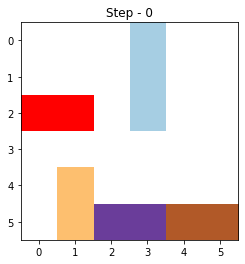

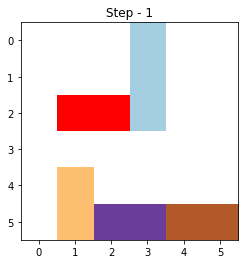

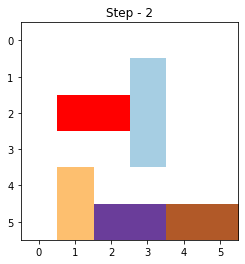

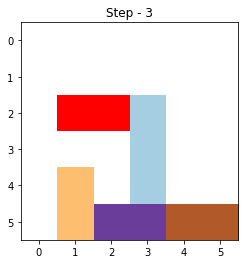

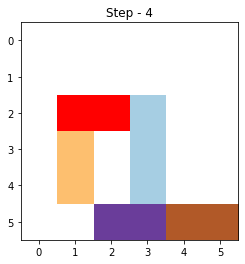

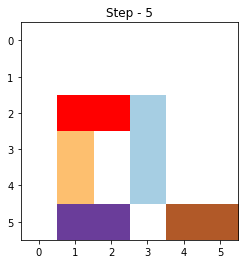

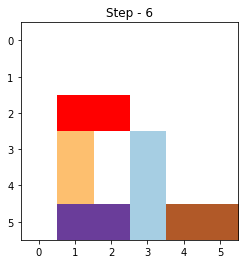

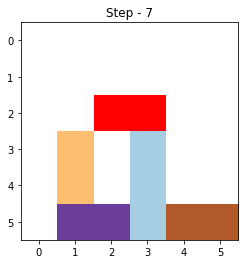

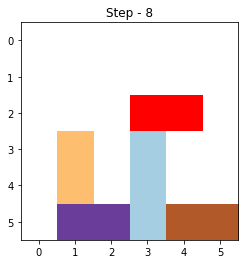

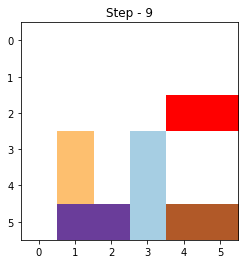

In [ ]:
for i, s in enumerate(s1.solve_puzzle()):
    plt.figure()
    plt.title(f'Step - {i}')
    s.plot_state_grid()

Try another one

In [ ]:
start = State()
start.N = 6
start.goal = [2, 5]
start.cars.append(Car(2, 0, 2, True))
start.cars.append(Car(4, 0, 3, True))
start.cars.append(Car(1, 2, 3, False))
start.cars.append(Car(3, 3, 2, True))
start.cars.append(Car(4, 4, 2, False))
start.cars.append(Car(3, 5, 3, False))

<ipython-input-8-272b5318ba4e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


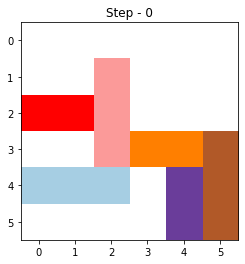

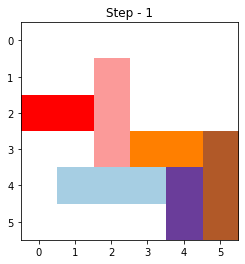

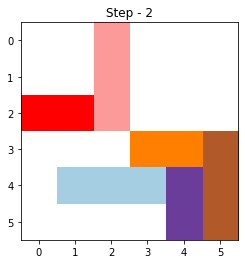

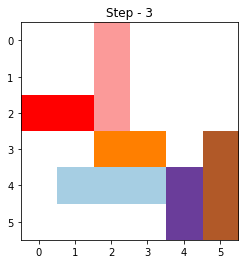

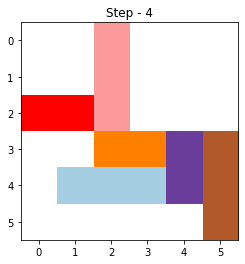

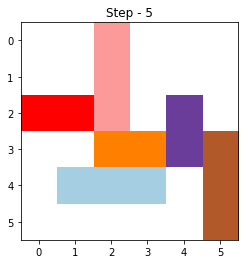

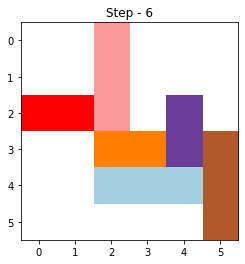

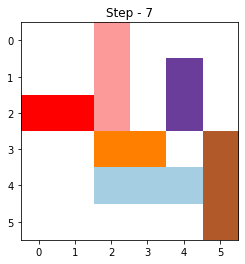

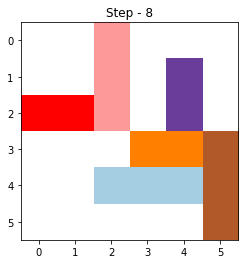

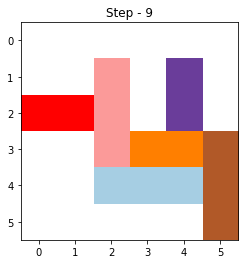

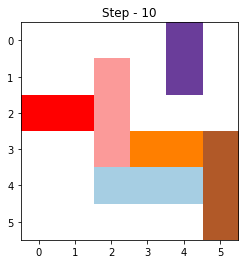

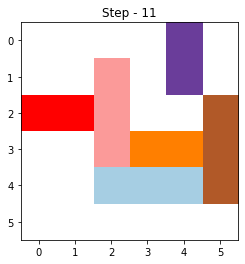

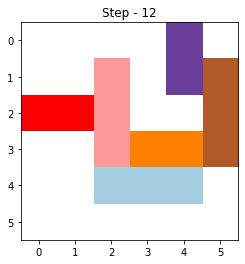

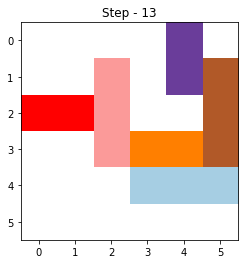

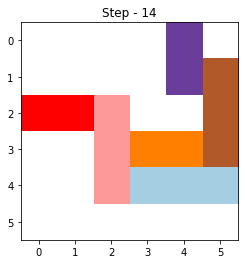

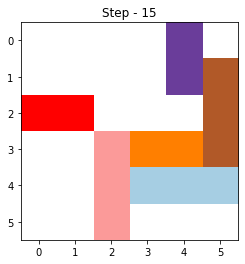

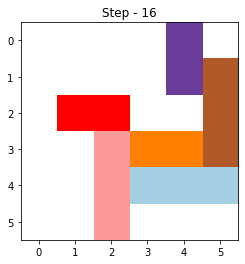

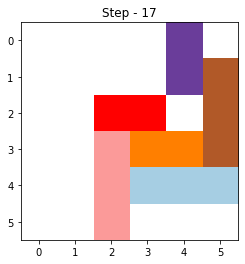

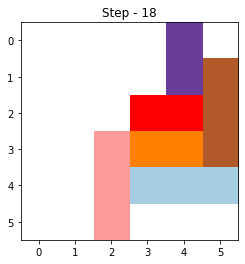

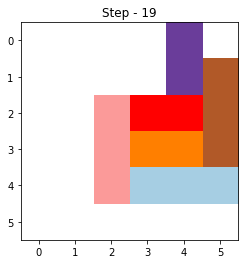

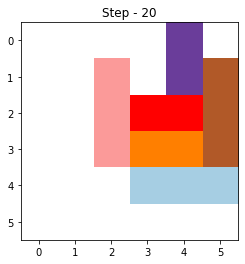

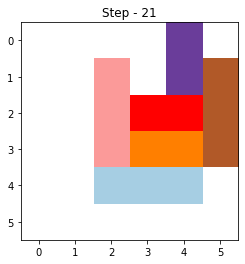

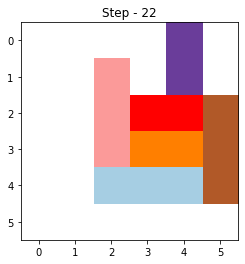

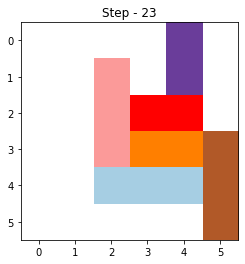

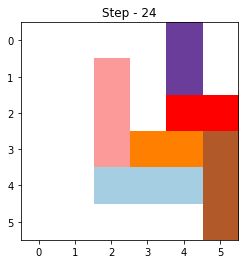

In [ ]:
for i, s in enumerate(start.solve_puzzle()):
    plt.figure()
    plt.title(f'Step - {i}')
    s.plot_state_grid()

# Build

In [ ]:
build_notebook()

<IPython.core.display.Javascript object>

Converted hw6.ipynb.
